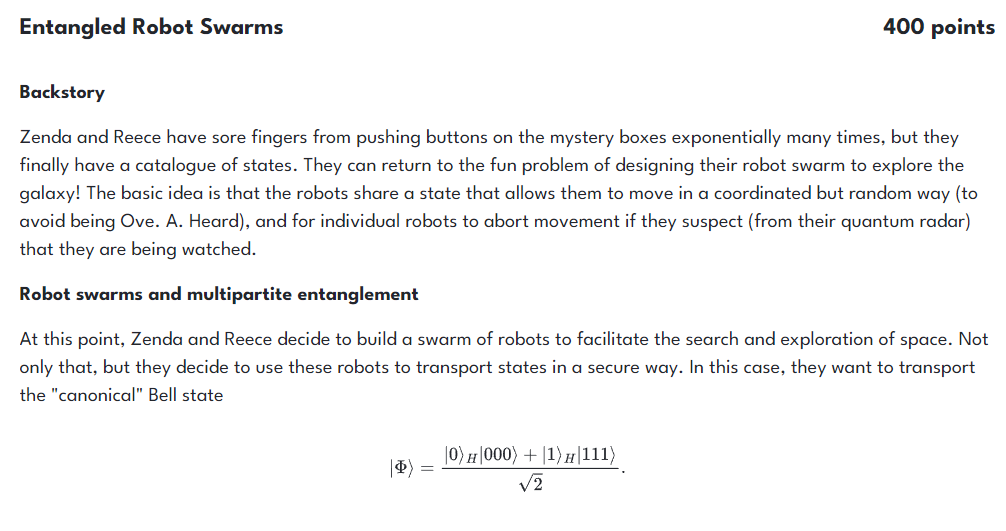

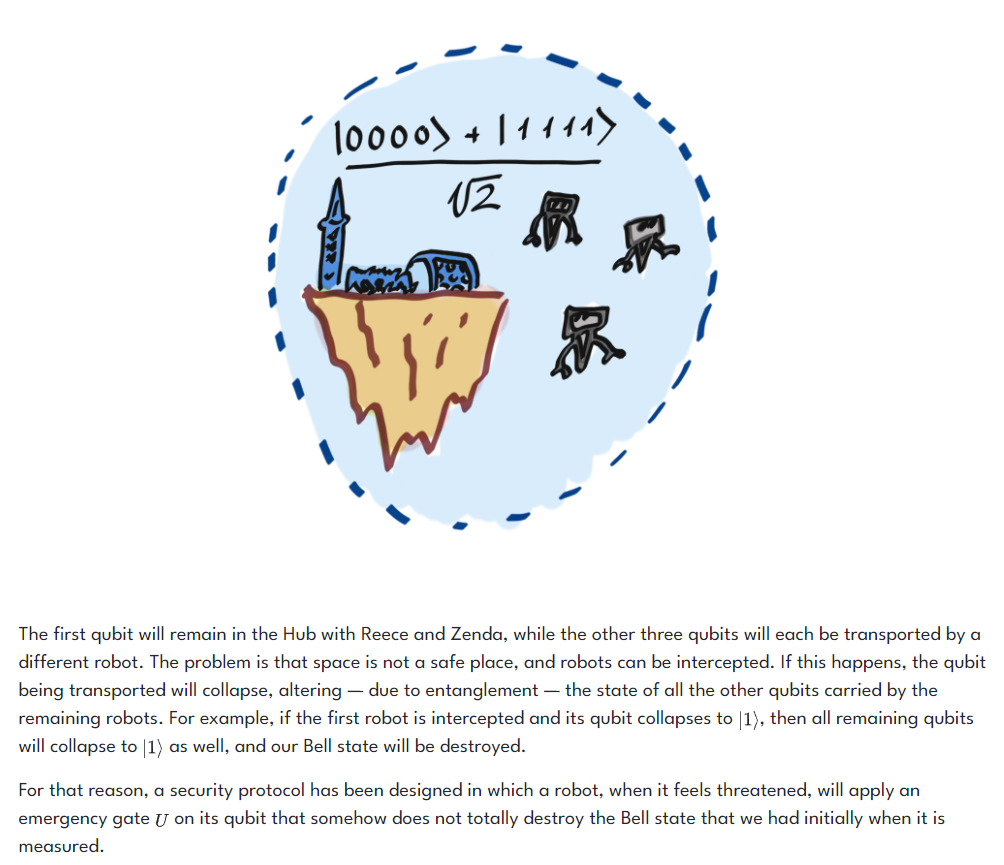

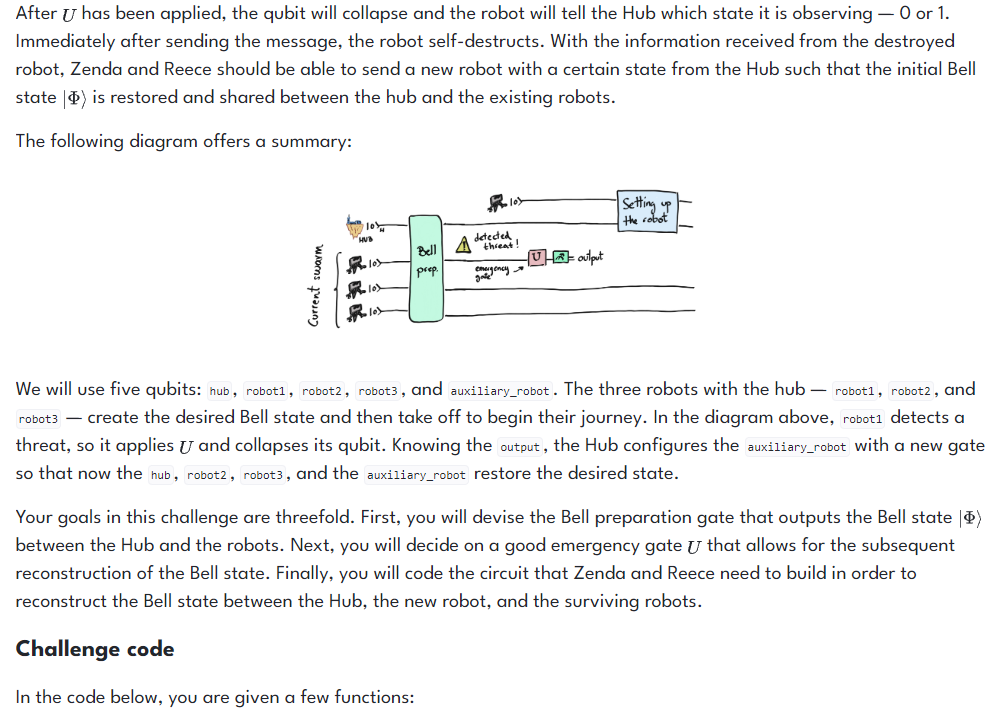

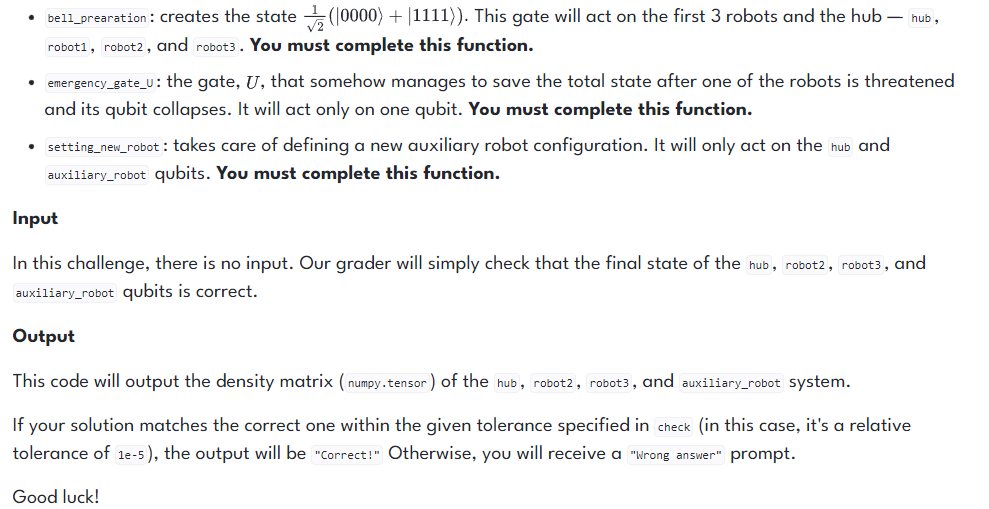

In [ ]:
import pennylane as qml
import pennylane.numpy as np

def bell_preparation(wires):
    """
    Quantum function in charge of generating the bell state of 4 qubits.
    You simply add the necessary gates, do not return anything.

    Args:
        wires (list(str)): list of the 4 wires where the gate will run

    """

def emergency_gate_U(wire):
    """
    Quantum function that will define the emergency protocol in a qubit.
    You simply add the necessary gates, do not return anything.

    Args:
        wire(str): name of the wire where the emergency gate will be apply.

    """

def setting_new_robot(output, wires):
    """
    Quantum function that defines the operation between the hub and the auxiliary robot.

    Args:
        output (int): 0 or 1, indicates the measurement output of robot1 after collapsing.
                    Take a look at qml.cond to see how to condition operators to this value.

        wires(list(str)): name of the wires where the gate will be apply.

    """


wires = ["hub", "robot1", "robot2", "robot3", "auxiliary_robot"]
dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def circuit():
    bell_preparation(wires=["hub", "robot1", "robot2", "robot3"])
    emergency_gate_U(wire="robot1")
    output = qml.measure(wires="robot1")
    setting_new_robot(output, wires=["hub", "auxiliary_robot"])
    return qml.density_matrix(wires=["hub", "robot2", "robot3", "auxiliary_robot"])


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    return None

def check(solution_output: str, expected_output: str) -> None:

    dev = qml.device("default.qubit", wires = 4)
    @qml.qnode(dev)
    def circuit2():
        bell_preparation(wires = range(4))
        return qml.state()

    bell = np.zeros(16)
    bell[0] = 1 / np.sqrt(2)
    bell[-1] = 1 / np.sqrt(2)

    assert np.allclose(circuit2(), bell), "The bell preparation is not correct!"

    dev = qml.device("default.qubit", wires=4)

    @qml.qnode(dev)
    def circuit3():
        bell_preparation(wires=range(4))
        return qml.density_matrix(wires = range(4))

    assert np.allclose(circuit3(), circuit()), "The final state is not correct!"


test_cases = [['No input', 'No output']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")